# Problem Statement
Find a point in $\mathbb{R}^{2}$ with the least average Euclidean distance to a set of arbitrary points

We will use  Gradient Descent to approach this problem


# Visualizing the Problem : Generate pts in $\mathbb{R}^{2}$

In [34]:
# write code below 
from random import Random
SEED =10
rand_gen=Random(SEED)
# initalizing with seed to get the same sequence of numbers at every time we run the cell
def generate_data(N=100):
    vecx,vecy=[],[]
    for _ in range(N):
        vecx.append(rand_gen.uniform(a=0,b=1))
        vecy.append(rand_gen.uniform(a=0,b=1))
    return vecx,vecy
datax,datay=generate_data()
print(datax[:5])
print(datay[:5])








[0.5714025946899135, 0.5780913011344704, 0.81332125135732, 0.6534725339011758, 0.5206693596399246]
[0.4288890546751146, 0.20609823213950174, 0.8235888725334455, 0.16022955651881965, 0.32777281162209315]


# Doing it by List Comprehension and Plotting it


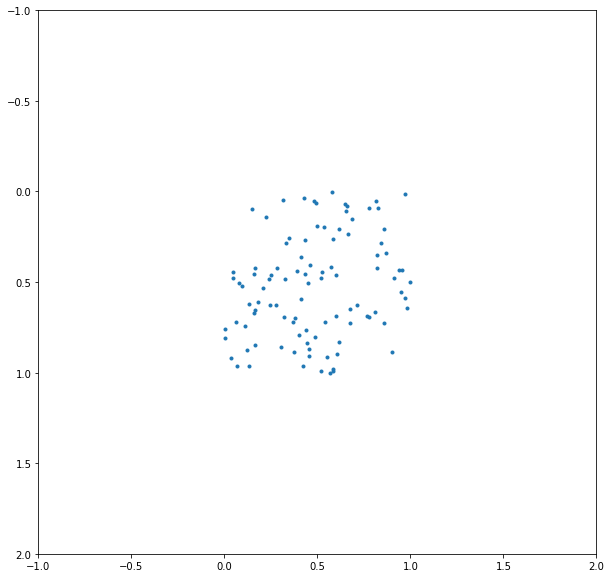

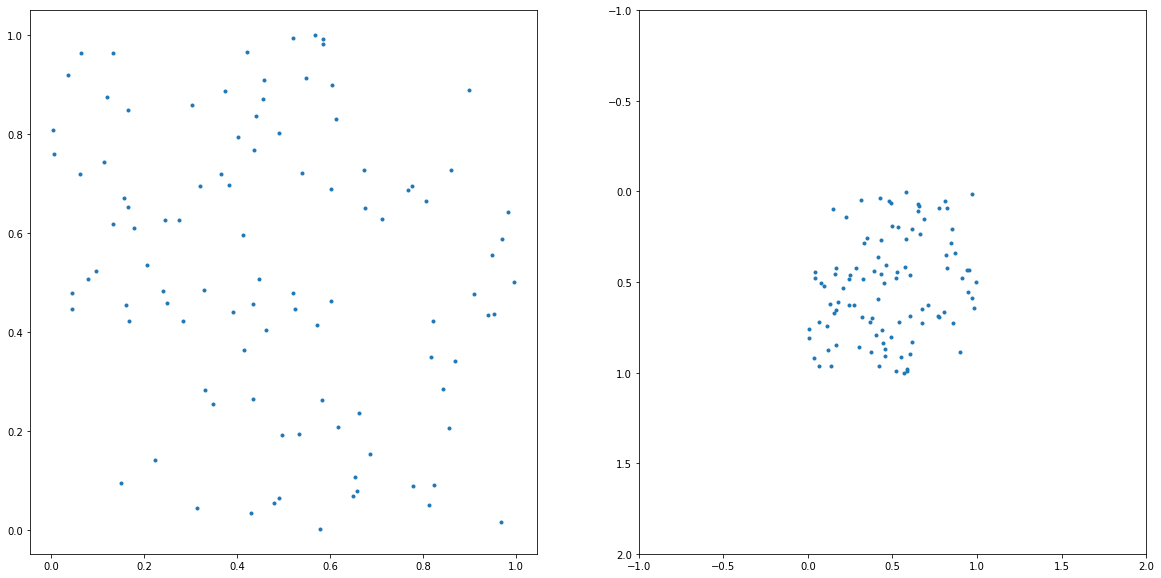

In [35]:
# Write code here
from random import Random
SEED =10
rand_gen=Random(SEED)
# initalizing with seed to get the same sequence of numbers at every time we run the cell
def generate_data(N=100):
    vecx,vecy=[],[]
    for _ in range(N):
        vecx.append(rand_gen.uniform(a=0,b=1))
    for _ in range(N):    
        vecy.append(rand_gen.uniform(a=0,b=1))
    return vecx,vecy
datax,datay=generate_data()
#print(datax[:5])
#print(datay[:5])
rand_gen=Random(SEED)
def generate_data_listcomp(N=100):
          return(
           [rand_gen.uniform(a=0,b=1) for _ in range(N) ], # do this whole first then process the other list so in the 1st method we made 2 loops for getting the same vals
           [rand_gen.uniform(a=0,b=1)  for _ in range(N) ]
          )

dx,dy=generate_data_listcomp()
#print(dx[:5])
#print(dy[:5])

from matplotlib.pyplot import figure
fig = figure(figsize=(10,10)) #dims of the plot block 
ax  = fig.add_subplot(1,1,1) # last par move 1 by 1 so elem[0][1] is 2 while [0][0] is 1 >> row majored , first 2 pars > quering to certain row,col
ax.scatter(x=dx,y=dy,marker=".")
ax.set_xlim(left=-1,right=2)
ax.set_ylim(top=-1,bottom=2)
fig.show() 

fig_dash = figure(figsize = (20, 10))
ax_new = fig_dash.add_subplot(1, 2, 1)
ax_new2 = fig_dash.add_subplot(1, 2, 2)
ax_new.scatter(x = dx, y = dy, marker = ".")
ax_new2.scatter(x = dx, y = dy, marker = ".")
ax_new2.set_xlim(left = -1, right = 2)
ax_new2.set_ylim(top = -1, bottom = 2)
fig_dash.show()

# The loss function
Let:
- The solution: ($x_{p}$, $y_{p}$)
- The dataset $\mathbb{D}$ is a {($x_{i}$, $y_{i}$)}
- $\mathbb{L}$ be the loss function and the solution be
$$(x_{p}, y_{p}) = argmin(\mathbb{L})$$
<br>

$$where\;\mathbb{L} = \frac{1}{N} \sum_{i=0}^{N-1}[(x_{i} - x_{p})^{2} + (y_{i} - y_{p})^{2}]^{\frac{1}{2}}$$

# Evaluate the Loss Function 


In [36]:
# Write your code here
from math import sqrt
def loss(x_p , y_p):
     return (1/len(dx))*sum(
         [sqrt((x_i - x_p)**2 + (y_i - y_p)**2 )
         for x_i,y_i in zip(dx,dy)
          ]
     )
# Note its not good to use dx,dy as a global variable in production
# you might pass it as a parameter to your loss function      


# Visualize Our Loss Function


In [37]:
# Write Your code here
# dont forget the x,y limits >> this will be our domain 
# we will use meshes just like solving a numerical PDE and the mesh size it self will be our step variable
# iteratively we will evaluate the loss for each point and minimize on our loss value 
step=0.01
Mesh_size=300
# so why 300? observe that domain[-1,2] >> the len = 3 , step is 0.01 so for each 1 cell we need 100 meshes to process (100*0.01=1), finally Mesh_Size =  3*100=300 meshes
x_mesh = [-1+ i*step for i in range(Mesh_size)]
y_mesh = [-1+ i*step for i in range(Mesh_size)]

loss_mesh = [ 
    [loss(x_cur,y_cur) for x_cur in x_mesh] for y_cur in y_mesh
]

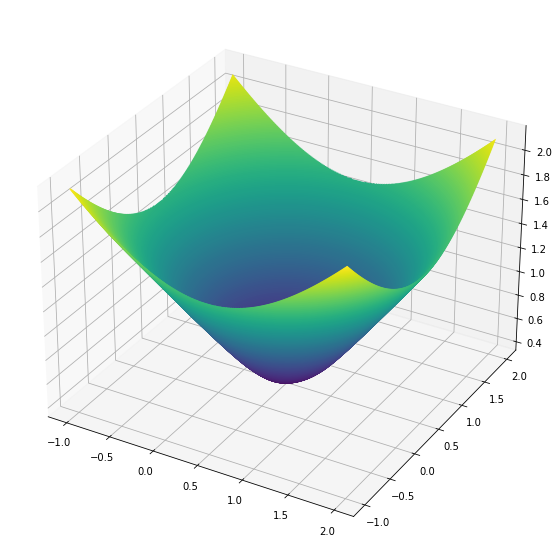

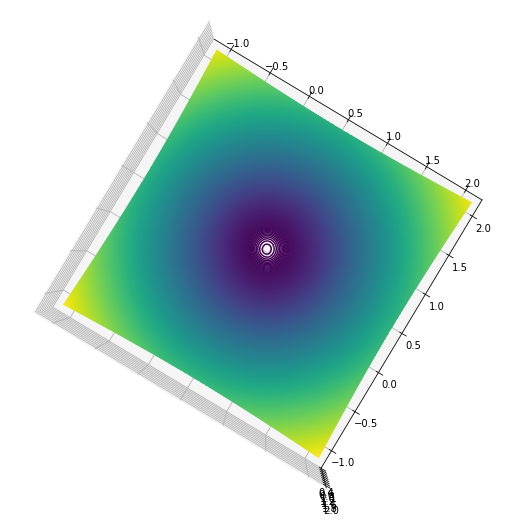

In [38]:
fig = figure(figsize = (10,10))
ax  = fig.add_subplot(1,1,1,projection ="3d")
ax.contour(x_mesh , y_mesh , loss_mesh, levels = 500)
fig.show()


fig2 = figure(figsize = (20,10))
ax2 = fig2.add_subplot(1,2,1,projection="3d")
ax2.contour(x_mesh,y_mesh,loss_mesh,levels = 500)
ax2.view_init(90)
fig2.show()


by analogy when you are working on a neural network, instead of x,y we will use parameters Like the weights we talked about on disc lec 1
and always our goal is to find the argmin(loss) >> the point where our loss is minimized

till now we got our argmin(Loss) visually lets find it numerically



# Numeric Conceptualization of Derivatives
It comes for the main definition of the derivative
<br><br>
$\frac{\partial \mathbb{L}}{\partial x} = \lim_{h \to 0} \frac{\mathbb{L}(x+h) - \mathbb{L}(x)}{h}$
<br><br>
By replacing the asymptotically infinitesimal by pragmatically small of values we can get a definition of deriviative that can be numerically computed 


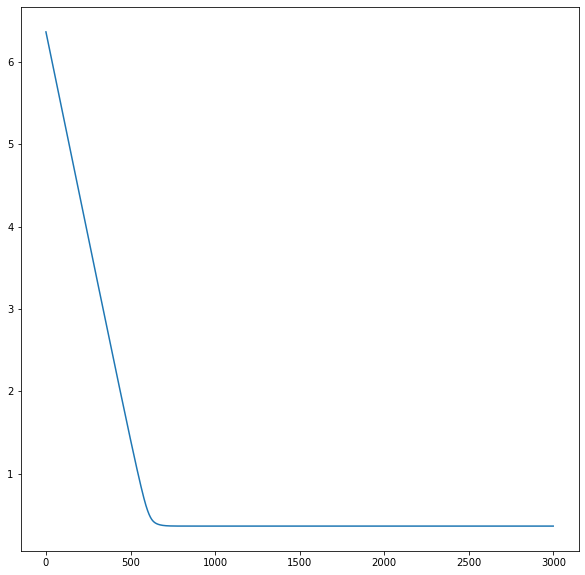

In [39]:
x_p,y_p = 5,5
EPOCHS = 3000
DELTA = 0.01
H = 0.001
epoch_losses = []
for _ in range(EPOCHS):
      epoch_losses.append(loss(x_p,y_p))
      dlossx=(loss(x_p + H,y_p)-loss(x_p,y_p))/H
      dlossy=(loss(x_p ,y_p + H)-loss(x_p,y_p))/H
      x_p-=DELTA*dlossx
      y_p-=DELTA*dlossy
      # here we move agianst the gradient as dlossx,y give us how the gradient is growing 
      # so if we moved against it we are minimizing on our loss value
fig = figure(figsize = (10,10))
ax =  fig.add_subplot(1 ,1 ,1 )
ax.plot(epoch_losses)
fig.show()

Print Our answer : the point with the least average Euclidean distance to a set of arbitrary points in $\mathbb{R}^{2}$

In [40]:
print(x_p,y_p)

0.46060318444628434 0.5268501432964828
